### I decided to treat this as a classification problem by creating a new binaryvariable affair (did the woman have at least one affair?) and trying to predict the classification for each woman.

In [153]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 


In [154]:
# laod datasets
affairdata =sm.datasets.fair.load_pandas().data

In [155]:
affairdata.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [156]:
# Check if there any null exists
affairdata.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [157]:
affairdata.affairs>0

0        True
1        True
2        True
3        True
4        True
        ...  
6361    False
6362    False
6363    False
6364    False
6365    False
Name: affairs, Length: 6366, dtype: bool

In [159]:
# 1 represents having affairs and 0 represents not having affairs

affairdata['affair']=(affairdata.affairs>0).astype(int)

In [160]:
affairdata.groupby('affairs').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
affairs,,,,,,,,,
0.000000,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0
0.043478,3.681818,41.090909,23.000000,3.272727,2.409091,14.500000,3.681818,4.363636,1
0.060606,4.318182,33.363636,16.500000,2.931818,2.590909,13.727273,3.363636,4.227273,1
0.076923,3.160000,31.800000,13.000000,1.840000,2.280000,13.960000,3.480000,3.640000,1
0.111111,3.862069,29.413793,9.000000,1.655172,2.172414,15.206897,3.620690,4.137931,1
...,...,...,...,...,...,...,...,...,...
25.599991,3.000000,22.000000,2.500000,0.500000,2.000000,13.000000,2.500000,2.500000,1
26.879990,3.000000,23.666667,2.500000,0.666667,1.666667,13.666667,4.000000,3.000000,1
38.399994,3.000000,27.000000,2.500000,0.000000,1.000000,14.000000,4.000000,6.000000,1


In [161]:
affairdata.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


In [162]:
affairdata

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


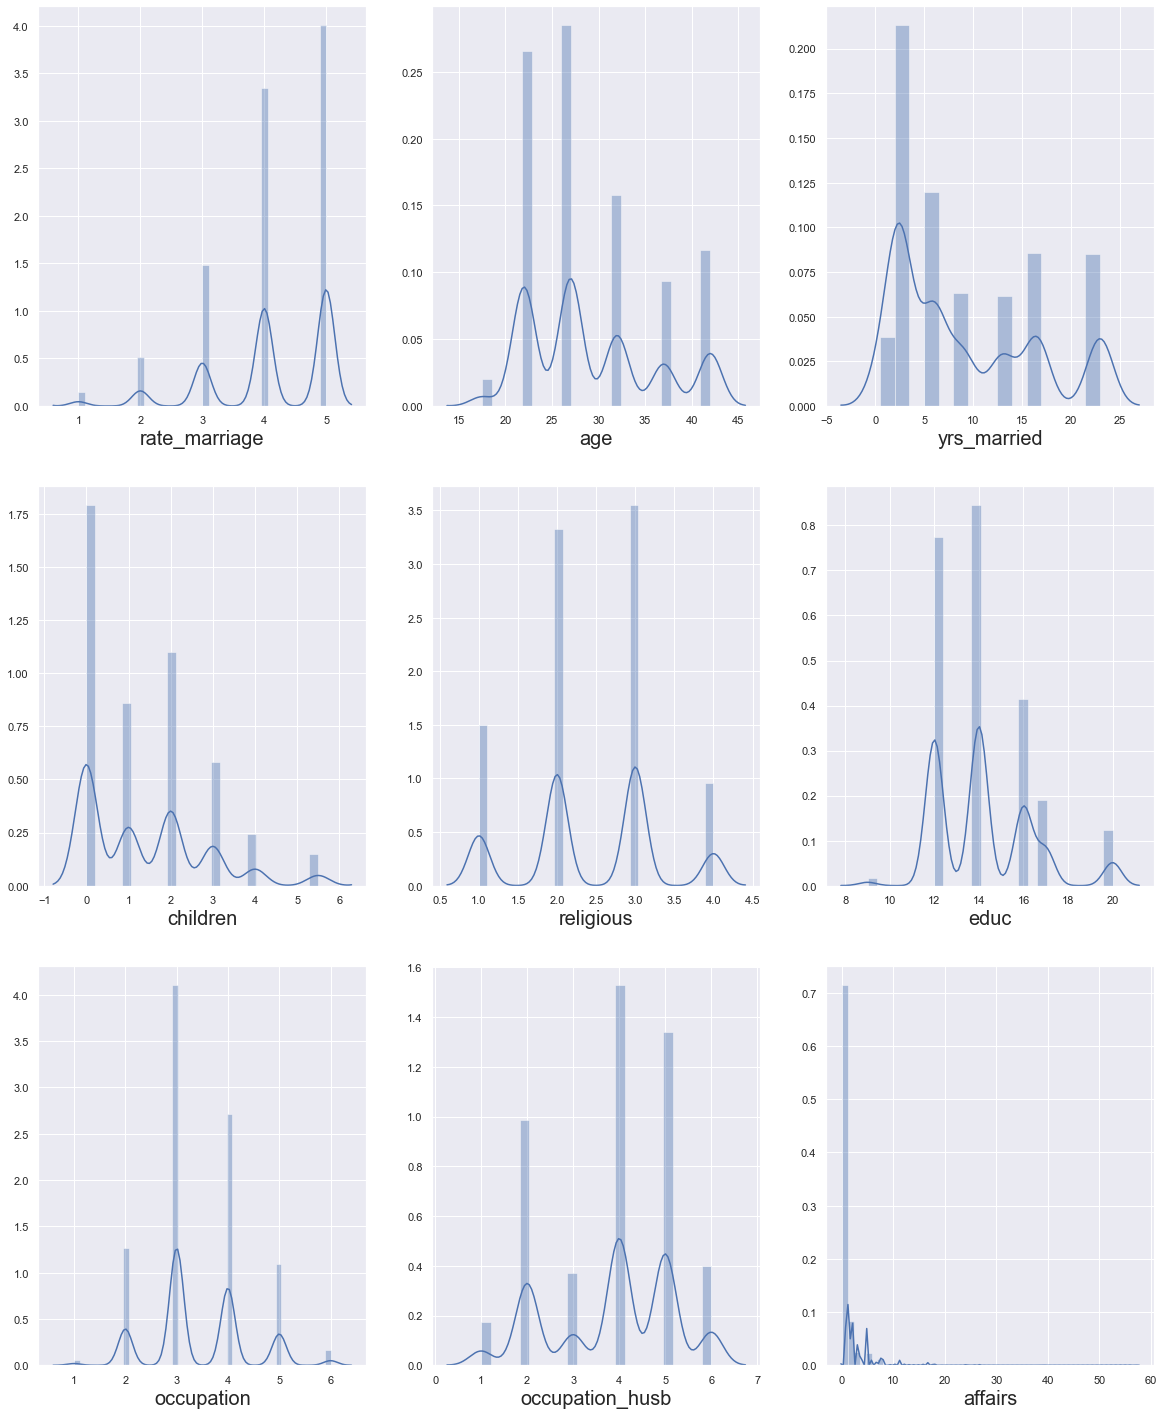

In [163]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in affairdata:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(affairdata[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

## Prepare Data for Logistic Regression

In [104]:
affairdata.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


To prepare the data, we will add an intercept column as well as dummy variables for occupation and occupation_husb, since we are treating them as categorial variables. 
The dmatrices function from the patsy module can do that using formula language.

In [164]:
y, X = dmatrices('affair ~ rate_marriage + age +yrs_married + children +  religious + educ +C(occupation) + C(occupation_husb)',affairdata, return_type="dataframe")

In [165]:
print(X)

      Intercept  C(occupation)[T.2.0]  C(occupation)[T.3.0]  \
0           1.0                   1.0                   0.0   
1           1.0                   0.0                   1.0   
2           1.0                   0.0                   1.0   
3           1.0                   0.0                   0.0   
4           1.0                   0.0                   1.0   
...         ...                   ...                   ...   
6361        1.0                   0.0                   0.0   
6362        1.0                   0.0                   0.0   
6363        1.0                   0.0                   1.0   
6364        1.0                   0.0                   1.0   
6365        1.0                   1.0                   0.0   

      C(occupation)[T.4.0]  C(occupation)[T.5.0]  C(occupation)[T.6.0]  \
0                      0.0                   0.0                   0.0   
1                      0.0                   0.0                   0.0   
2                    

In [166]:
print(y)

      affair
0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
...      ...
6361     0.0
6362     0.0
6363     0.0
6364     0.0
6365     0.0

[6366 rows x 1 columns]


In [167]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',

'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [168]:
# Transform Y in 1-Array
y = np.ravel(y)

In [169]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [170]:
model =LogisticRegression()


In [171]:
X

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [172]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [173]:
model=model.fit(X,y)

C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [174]:
model.score(X,y)

0.7258875274897895

In [136]:
y.mean()

0.3224945020420987

In [142]:
x = np.arange(4).reshape((2,2))
print(x)
np.transpose(x)

[[0 1]
 [2 3]]


array([[0, 2],
       [1, 3]])

In [175]:
# Let's examine the coefficients to see what we learn-

In [176]:
print(model.coef_)

[[ 1.48988372  0.18804559  0.4989262   0.25064665  0.83898298  0.83392128
   0.1905468   0.29774456  0.1613194   0.18768299  0.19391685 -0.70312082
  -0.05841771  0.10567678  0.01691952 -0.37113532  0.00401621]]


In [177]:
np.transpose(model.coef_)

array([[ 1.48988372],
       [ 0.18804559],
       [ 0.4989262 ],
       [ 0.25064665],
       [ 0.83898298],
       [ 0.83392128],
       [ 0.1905468 ],
       [ 0.29774456],
       [ 0.1613194 ],
       [ 0.18768299],
       [ 0.19391685],
       [-0.70312082],
       [-0.05841771],
       [ 0.10567678],
       [ 0.01691952],
       [-0.37113532],
       [ 0.00401621]])

In [178]:
X.columns

Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ'],
      dtype='object')

In [179]:
x=zip(X.columns,np.transpose(model.coef_))
x

In [180]:
pd.DataFrame(list(zip(X.columns,np.transpose(model.coef_))))

,0,1
0,Intercept,[1.4898837191561822]
1,occ_2,[0.18804559360693357]
2,occ_3,[0.49892619862824583]
3,occ_4,[0.25064665088252186]
4,occ_5,[0.838982984284573]
5,occ_6,[0.833921282897679]
6,occ_husb_2,[0.19054680309161234]
7,occ_husb_3,[0.29774456048731124]
8,occ_husb_4,[0.1613193985869675]
9,occ_husb_5,[0.18768299137273103]


In [181]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.3, random_state = 0)
model2=LogisticRegression()
model2.fit(X_train,y_train)

C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [182]:
predicted=model2.predict(X_test)

In [185]:
 # We now need to predict class labels for the test set. We will also generate the class probabilities, just to take a look.

In [186]:
print(predicted)

[1. 0. 0. ... 0. 0. 0.]


In [187]:
probs=model2.predict_proba(X_test)
print(probs)

[[0.35146336 0.64853664]
 [0.90955084 0.09044916]
 [0.72567333 0.27432667]
 ...
 [0.55727384 0.44272616]
 [0.81207045 0.18792955]
 [0.74734601 0.25265399]]


In [190]:
probs[:,1]

array([0.64853664, 0.09044916, 0.27432667, ..., 0.44272616, 0.18792955,
       0.25265399])

In [191]:
print(metrics.accuracy_score(y_test,predicted))
print(metrics.roc_auc_score(y_test,probs[:,1]))

0.7298429319371728
0.7459493426018529


The accuracy is 73%, which is the same as we experienced when training and predicting on the same data.

In [192]:
print(metrics.confusion_matrix(y_test,predicted))
print(metrics.classification_report(y_test,predicted))

[[1169  134]
 [ 382  225]]
              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      1303
         1.0       0.63      0.37      0.47       607

    accuracy                           0.73      1910
   macro avg       0.69      0.63      0.64      1910
weighted avg       0.71      0.73      0.71      1910



In [ ]:
# Now let's try 10-fold cross-validation, to see if the accuracy holds up more rigorously.

In [133]:
scores=cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=10)
print(scores)
print(scores.mean())

C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

[0.72100313 0.70219436 0.73824451 0.70597484 0.70597484 0.72955975
 0.7327044  0.70440252 0.75157233 0.75      ]
0.7241630685514876


C:\Users\shrey\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Looks good. It's still performing at 73% accuracy.So our model is ready for prediction!